In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

In [144]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.metrics import mean_squared_error,r2_score
## Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
#from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers import Dropout

In [145]:
# Load Train data from our github repo
url_train = 'https://raw.githubusercontent.com/tjayada/iANNwTF_Project/main/data/cleaned%20data%20(1)/data_without_columns_train.csv'
dataDF_train = pd.read_csv(url_train)

# Load Train label data from our github repo
url_train_labels = 'https://raw.githubusercontent.com/tjayada/iANNwTF_Project/main/data/cleaned%20data%20(1)/data_without_columns_train_labels.csv'
dataDF_train_labels = pd.read_csv(url_train_labels)

In [146]:
# drop indexes 
dataDF_train = dataDF_train.drop("Unnamed: 0", axis = 1)
dataDF_train_labels = dataDF_train_labels.drop("Unnamed: 0", axis = 1)

In [147]:
dataDF_train = dataDF_train.to_numpy()
dataDF_train_labels = dataDF_train_labels.to_numpy()

In [148]:
# reshape input to be 3D [samples, timesteps, features]
dataDF_train = dataDF_train.reshape((dataDF_train.shape[0], 1, dataDF_train.shape[1]))

In [149]:
X_train, X_valid, y_train, y_valid = train_test_split(dataDF_train, dataDF_train_labels, test_size=0.25, random_state=1)

In [150]:
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
#model.add(LSTM(100, return_sequences=True))
#model.add(Dropout(0.1))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1))

In [151]:
model.compile(loss='mse',
                metrics=[tf.keras.metrics.RootMeanSquaredError()],
                optimizer=tf.keras.optimizers.Adam(0.01))

In [152]:
history = model.fit(
    X_train, y_train,
    batch_size = 64,
    epochs=400,
    #callbacks = [callback],
    validation_data=(X_valid, y_valid),
    verbose=1,
    shuffle = False
    #validation_split = 0.1
    )

#model.fit(train_X, train_y, epochs=10, batch_size=20, validation_data=(test_X, test_y), verbose=1, shuffle=False)

Epoch 1/400
214/214 [==============================] - 7s 13ms/step - loss: 2800.3938 - root_mean_squared_error: 52.9187 - val_loss: 2237.8872 - val_root_mean_squared_error: 47.3063
Epoch 2/400
214/214 [==============================] - 2s 9ms/step - loss: 2343.9634 - root_mean_squared_error: 48.4145 - val_loss: 2238.3623 - val_root_mean_squared_error: 47.3113
Epoch 3/400
214/214 [==============================] - 2s 9ms/step - loss: 2359.7727 - root_mean_squared_error: 48.5775 - val_loss: 2238.4612 - val_root_mean_squared_error: 47.3124
Epoch 4/400
214/214 [==============================] - 2s 9ms/step - loss: 2354.2063 - root_mean_squared_error: 48.5202 - val_loss: 2238.3733 - val_root_mean_squared_error: 47.3114
Epoch 5/400
214/214 [==============================] - 2s 9ms/step - loss: 2351.0115 - root_mean_squared_error: 48.4872 - val_loss: 2238.3557 - val_root_mean_squared_error: 47.3113
Epoch 6/400
214/214 [==============================] - 2s 9ms/step - loss: 2350.5251 - root_me

In [153]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_train).astype(np.int64)
y_true = y_train#.astype(np.int64)

print(np.sqrt(mean_squared_error(y_true, y_pred)))

22.807084898539784


In [154]:
y_pred = model.predict(X_valid).astype(np.int64)
y_true = y_valid#.astype(np.int64)

print(np.sqrt(mean_squared_error(y_true, y_pred))) 

30.41388801146041


In [155]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

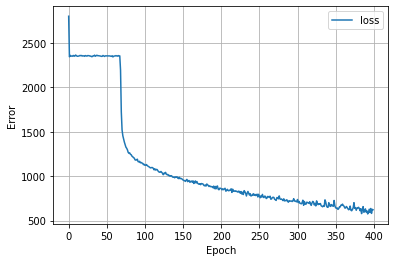

In [156]:
plot_loss(history)